In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/apple-inc-stock-historical-prices/AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600.0
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800.0
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000.0
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600.0
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600.0


In [4]:
data.describe()

,Open,High,Low,Close,Day Difference,Adj Close,Volume
count,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,1.079100e+04
mean,19.113833,19.326299,18.908083,19.124988,0.011155,18.394861,3.230263e+08
std,40.156308,40.614073,39.724960,40.186661,0.674173,39.808498,3.367116e+08
min,0.049665,0.049665,0.049107,0.049107,-7.080000,0.038050,0.000000e+00
25%,0.292411,0.300469,0.285536,0.292411,-0.010050,0.240748,1.175944e+08
50%,0.504464,0.513393,0.495536,0.504464,0.000000,0.414394,2.107616e+08
75%,18.555357,18.717322,18.412857,18.569287,0.012500,16.091877,4.030152e+08
max,196.240005,198.229996,195.279999,196.449997,10.160000,196.185074,7.421641e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10791 non-null  object 
 1   Open            10791 non-null  float64
 2   High            10791 non-null  float64
 3   Low             10791 non-null  float64
 4   Close           10791 non-null  float64
 5   Day Difference  10791 non-null  float64
 6   Adj Close       10791 non-null  float64
 7   Volume          10791 non-null  float64
dtypes: float64(7), object(1)
memory usage: 674.6+ KB


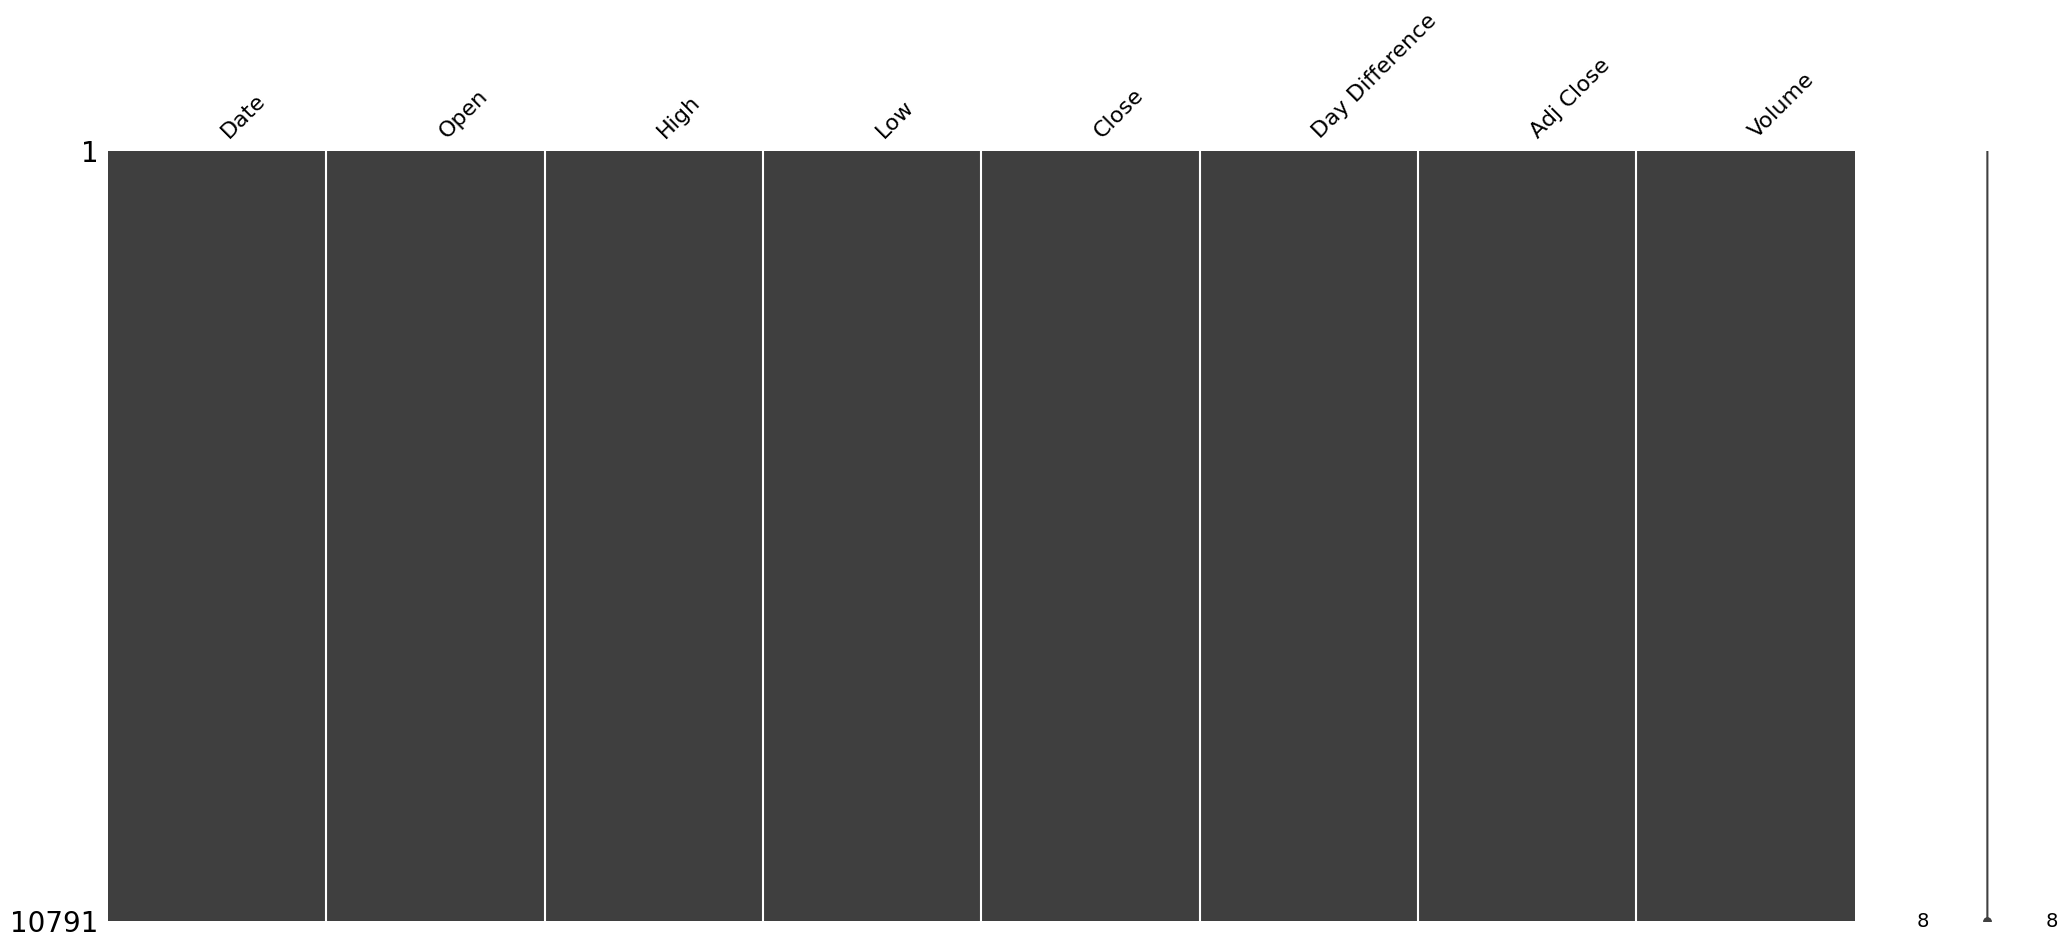

In [6]:
import missingno as misno
misno.matrix(data)
plt.show()

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [8]:
data['month'] = data['Date'].dt.month

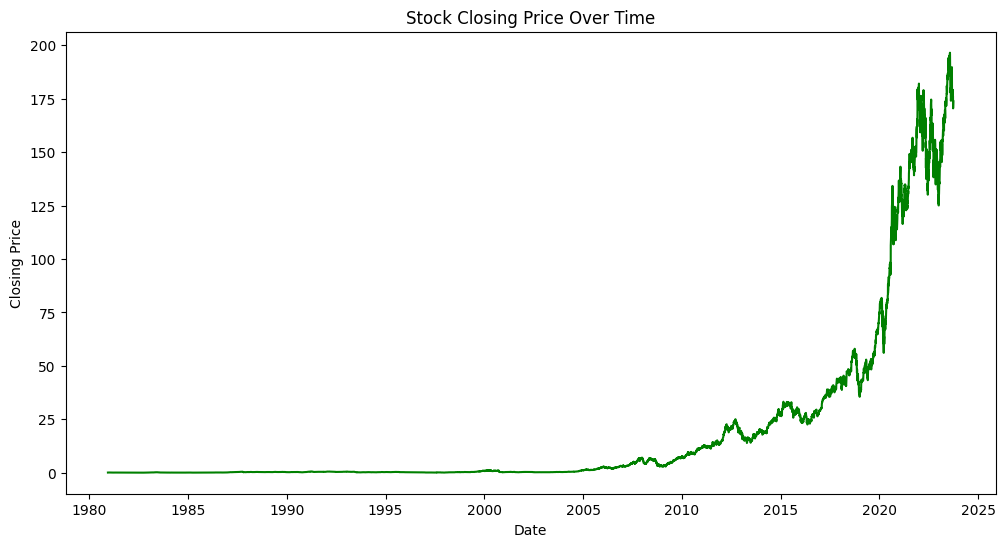

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.show()

In [10]:
data.head()

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume,month
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600.0,12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800.0,12
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000.0,12
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600.0,12
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600.0,12


In [11]:
import plotly.graph_objects as go
plt.figure(figsize=(12,6))
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

<Figure size 1200x600 with 0 Axes>

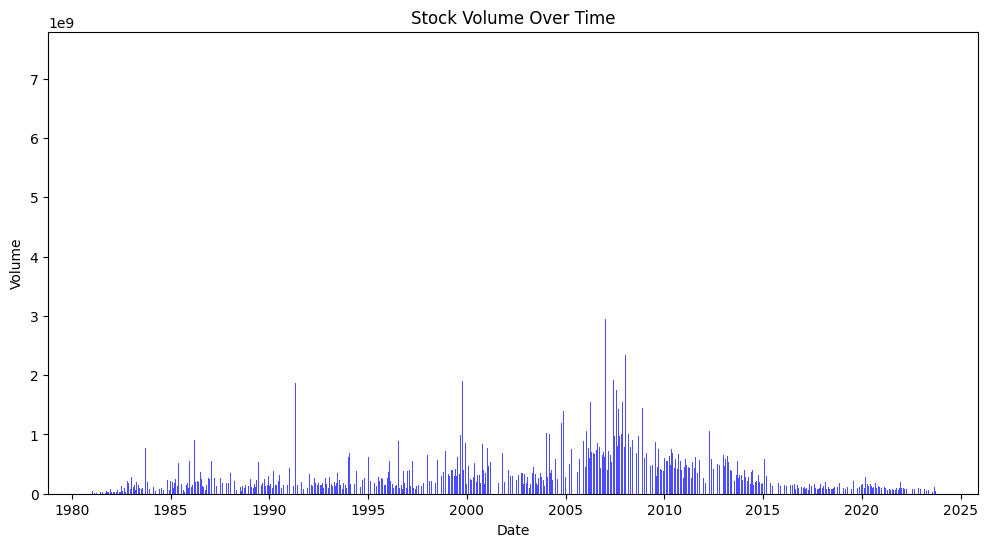

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Volume'], color='b', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.show()


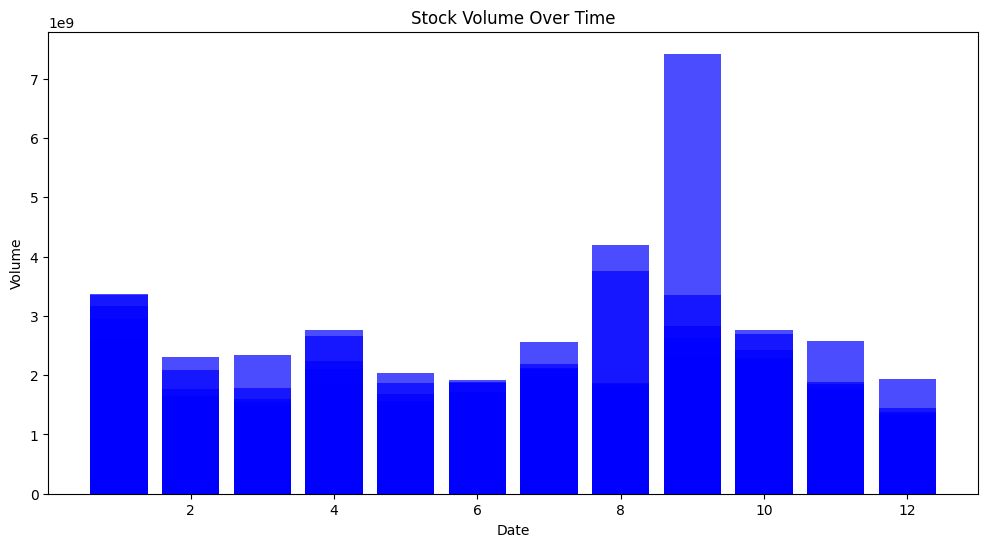

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(data['month'], data['Volume'], color='b', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.show()

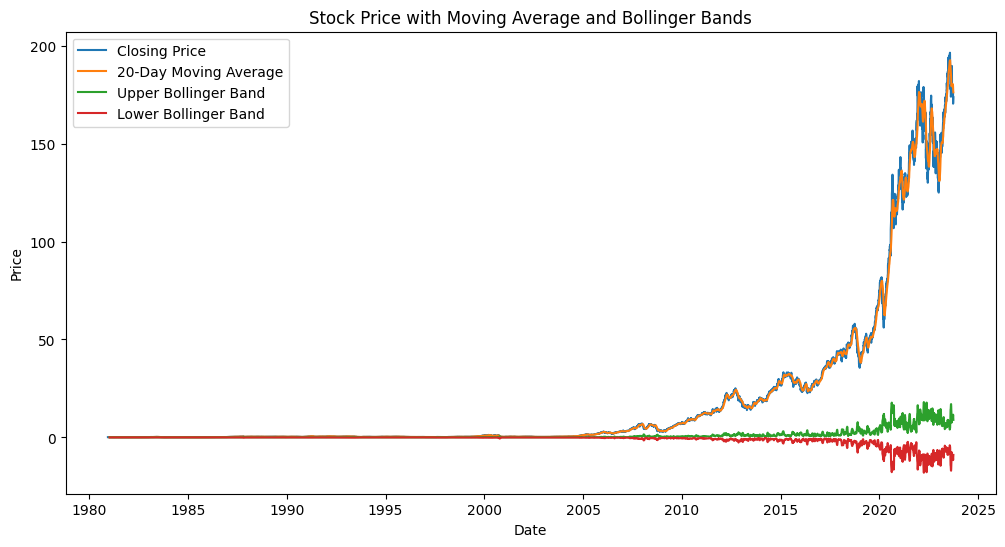

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['Close'].rolling(window=20).mean(), label='20-Day Moving Average')
plt.plot(data['Date'], data['Close'].rolling(window=20).std()*2, label='Upper Bollinger Band')
plt.plot(data['Date'], data['Close'].rolling(window=20).std()*-2, label='Lower Bollinger Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Average and Bollinger Bands')
plt.legend()
plt.show()


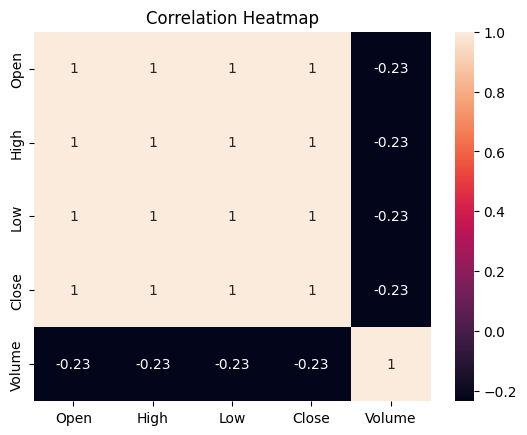

In [15]:
corr = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<h2>Rolling Window Analysis</h2>

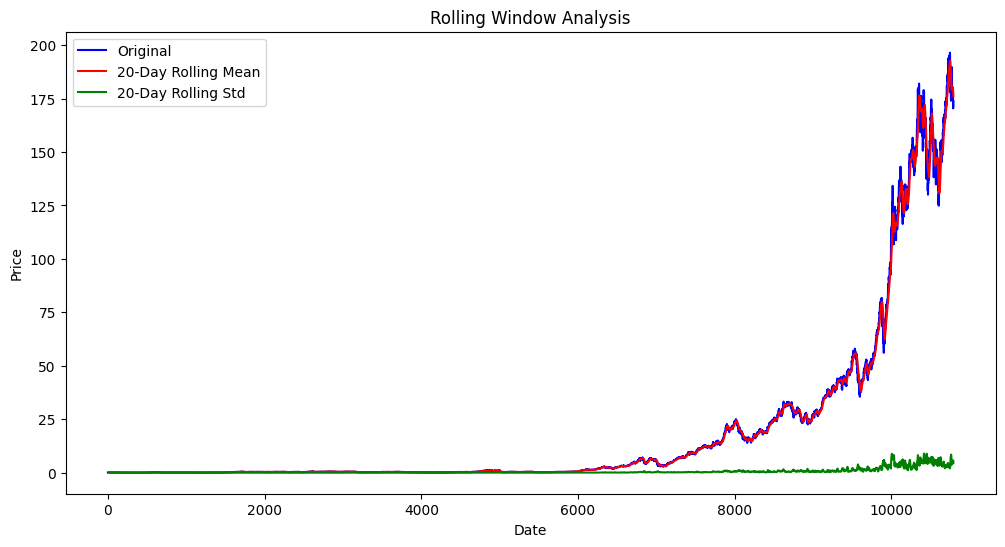

In [16]:
plt.figure(figsize=(12, 6))
data['Close'].plot(label='Original', color='blue')
data['Close'].rolling(window=20).mean().plot(label='20-Day Rolling Mean', color='red')
data['Close'].rolling(window=20).std().plot(label='20-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Window Analysis')
plt.legend()
plt.show()


 <h2>Lagged Scatter Plot for Autocorrelation</h2>

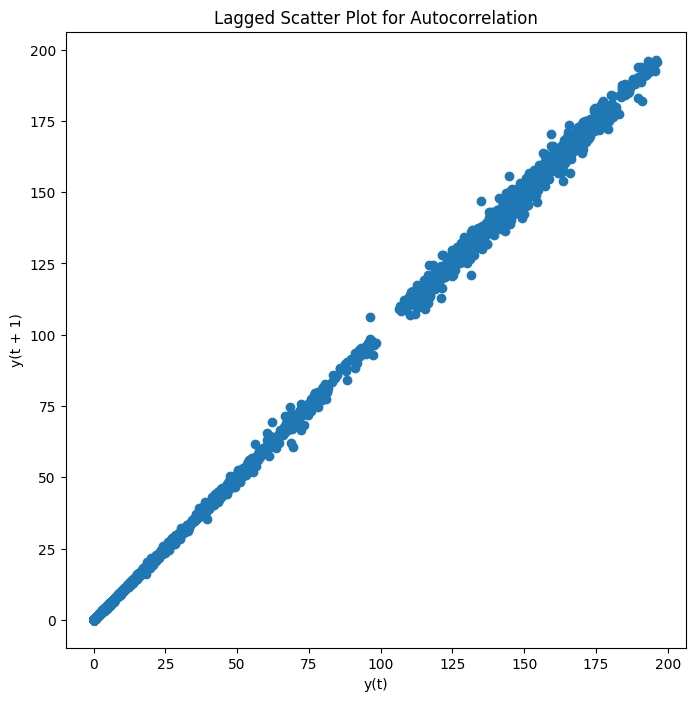

In [17]:
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 8))
lag_plot(data['Close'], lag=1)
plt.title('Lagged Scatter Plot for Autocorrelation')
plt.show()


<h2>Returns Distribution</h2>

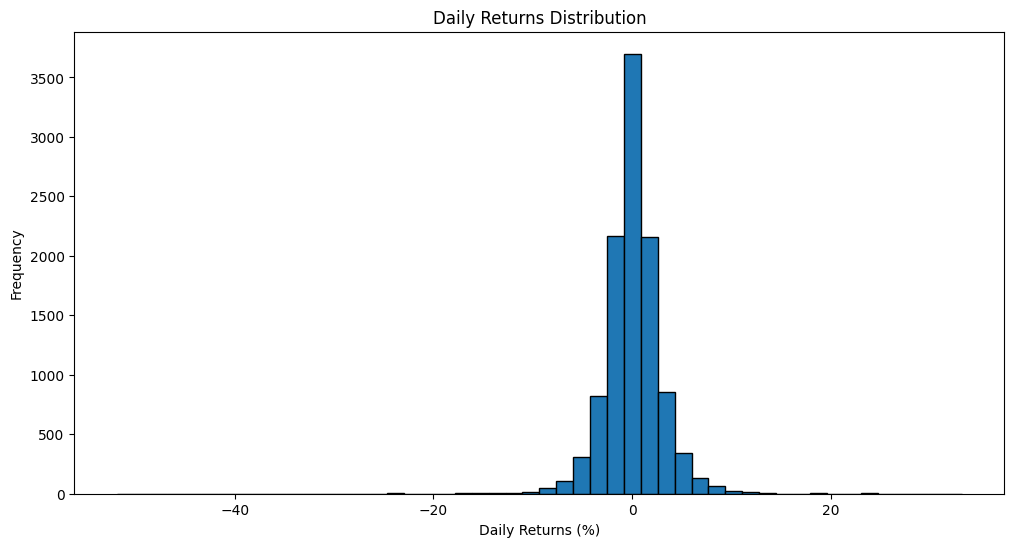

In [18]:
data['Daily Returns'] = data['Close'].pct_change() * 100
data['Daily Returns'].plot(kind='hist', bins=50, figsize=(12, 6), edgecolor='black')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.title('Daily Returns Distribution')
plt.show()


<h2>Relative Strength Index (RSI) Plot</h2>

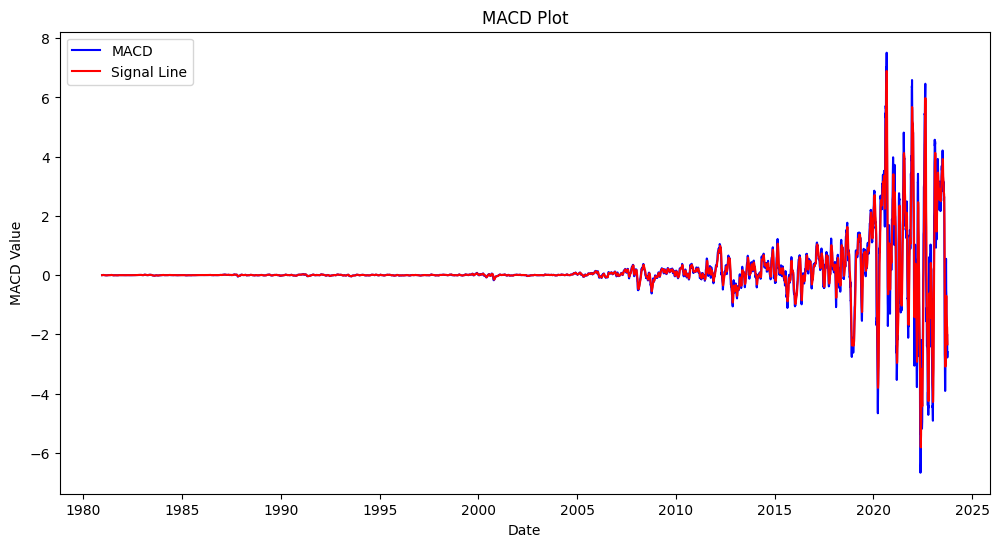

In [19]:
plt.figure(figsize=(12, 6))
data['12-day EMA'] = data['Close'].ewm(span=12, min_periods=0, adjust=False, ignore_na=False).mean()
data['26-day EMA'] = data['Close'].ewm(span=26, min_periods=0, adjust=False, ignore_na=False).mean()
data['MACD'] = data['12-day EMA'] - data['26-day EMA']
data['Signal Line'] = data['MACD'].ewm(span=9, min_periods=0, adjust=False, ignore_na=False).mean()

plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['Signal Line'], label='Signal Line', color='red')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('MACD Plot')
plt.legend()
plt.show()


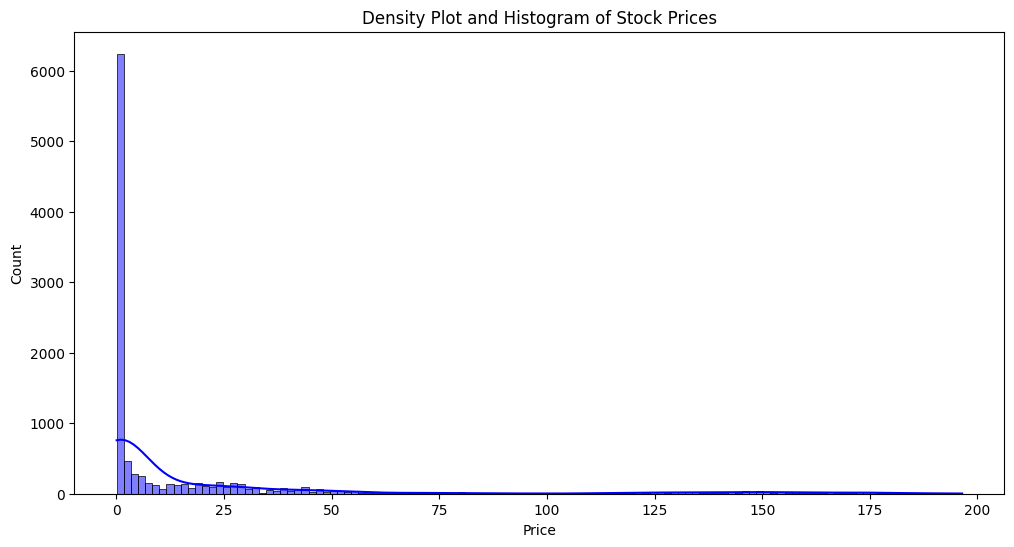

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], kde=True, color='blue')
plt.xlabel('Price')
plt.title('Density Plot and Histogram of Stock Prices')
plt.show()



<h2>Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots</h2>

<Figure size 1200x600 with 0 Axes>

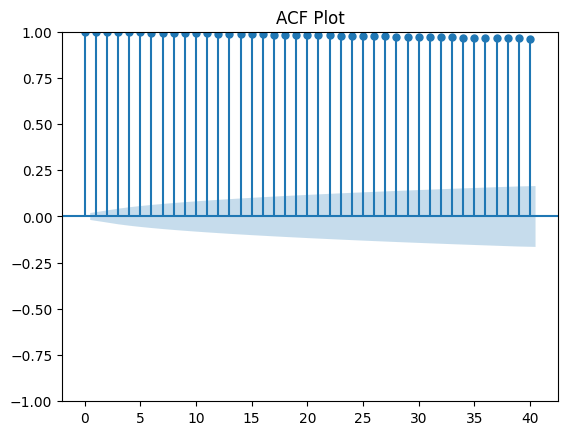

<Figure size 1200x600 with 0 Axes>

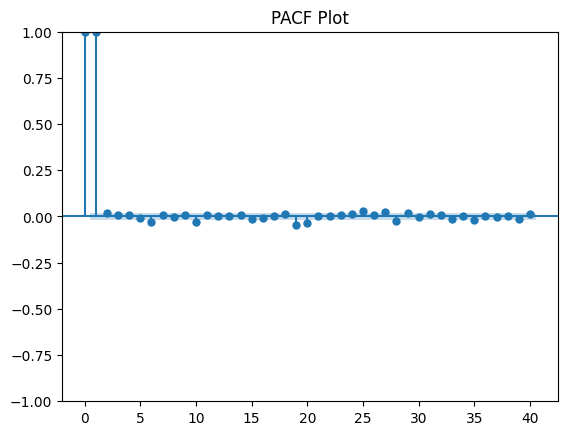

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Close'], lags=40, alpha=0.05)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Close'], lags=40, alpha=0.05)
plt.title('PACF Plot')
plt.show()


<p>In both plots, significant spikes or drops outside the dashed horizontal lines indicate a significant correlation. In the context of stock price analysis, these plots can be used to identify potential patterns or trends in the data. For instance, a spike at a particular lag in the ACF plot might suggest a seasonal pattern, and a sharp drop in the PACF plot after a certain lag might suggest the order for an AR model.

Both ACF and PACF plots are useful tools in the field of time series analysis and are commonly used in building forecasting models and understanding the underlying structure of time series data.<p>

<p>These plots and analyses provide deeper insights into the stock price data, including trend analysis, volatility, and market momentum.</p>

<p><h2>NOTE:</h2>Do Not invest base on this graphs, </p>

![](https://media1.giphy.com/media/3oEdva9BUHPIs2SkGk/200w.gif?cid=82a1493bfwsdfk1vaqaqqbtbqhffhr3hmjt3oxjsl3xo6465&ep=v1_gifs_related&rid=200w.gif&ct=g)